<a href="https://colab.research.google.com/github/TiaErikaDev/ADA-Tecnicas_Programacao/blob/main/%5BADA%5D_Analise_Exploratoria_Dados_Churn_%5BFINAL%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **INTRODUÇÃO**
Nesse artigo vamos explorar o dataset de uma empresa bancária. Realizaremos uma análise exploratória para descobrirmos quais as principais características de um futuro cliente *Churn*. 

*Churn* é o número total de clientes que, em um certo peródo de tempo, não querem mais comprar o produto de determinada empresa ou que não desejam mais utilizar do serviço prestado pela companhia. Essa rotatividade de clientes é algo constante e natural de qualquer negócio.

Toda empresa planeja e faz o máximo para ter o menor o *Churn* possível e assim obter uma maior retenção de clientes. Já um *Churn* alto indica que um maior número de clientes que cancelaram suas assinaturas.

No atual ambiente de negócios, cada vez mais competitivo, os clientes podem facilmente alternar entre os concorrentes. Por isso, a previsão da perda ou abandono de clientes - *churn* - é uma questão primordial no gerenciamento do relacionamento de clientes, conforme Zhu et al. (2017).

#### **OBJETIVO**
Realizar uma análise exploratória para identificar numa base de dados de instituição financeira o perfil do cliente que poderá cancelar sua conta, saindo da base de clientes.

#### **IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **CONJUNTO DE DADOS**
Primeiramente, é necessário entendermos melhor a base de dados que será estudada. 
- Quantidade de linhas: 10.000
- Quantidade de colunas: 13

A identificação das colunas:
- CustomerId: identificação do cliente.

- Surname: sobrenome do cliente.

- CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

- Geography: país que o serviço é oferecido.

- Gender: sexo do cliente.

- Age: idade do cleinte.

- Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

- Balance: saldo da conta corrente.

- NumOfProducts: número de produtos bancários adquiridos.

- HasCrCard: se tem cartão de credito ou não. (Sim = 1 | Não = 0)

- IsActiveMember: se é um cliente com conta ativa. (Ativo = 1)

- EstimatedSalary: salário estimado.

- Exited: cliente deixou de ser cliente do banco ou não. (Churn = 1)


In [ ]:
# Fazendo a leitura e mostrando as 5 primeiras linhas de dados.

df_churn = pd.read_csv('/content/drive/MyDrive/churn.csv', index_col='RowNumber')
df_churn.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Mostrando as informações do conjunto de dados.

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
# Fazendo a contagem única para cada variável

df_churn.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Excluindo as duas primeiras colunas

arr_delete = ['CustomerId', 'Surname']

df_churn.drop(arr_delete, axis=1, inplace = True)
df_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
# Quantidade de clientes por localidade

df_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# Quantidade de clientes separados por gênero

df_churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# Número de produtos

df_churn['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
# Quantidade de clientes que ficaram (0) e que saíram (1)

df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Descrição dos valores

df_churn.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


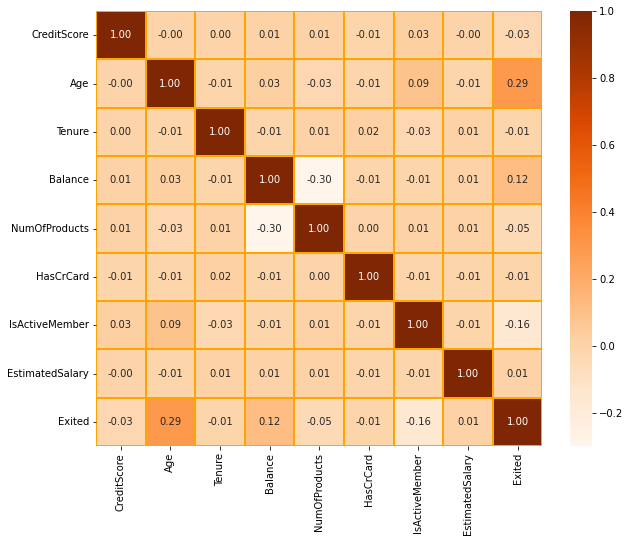

In [ ]:
# Observando a tabela de correlação

plt.figure(figsize = (10, 8))
sns.heatmap(df_churn.corr().round(2), linewidths = 1, cbar= True, annot=True, linecolor='orange', fmt = '.2f', cmap="Oranges")
plt.show()

### **ANÁLISE EXPLORATÓRIA**
Entender como as variáveis fornecidas se relacionam com o status 'Exited'.

### Qual é a quantidade de clientes que saíram ou ficaram no banco?

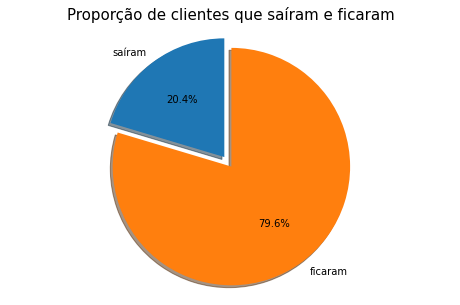

In [ ]:
labels = 'saíram', 'ficaram'
sizes = [df_churn.Exited[df_churn['Exited']==1].count(), df_churn.Exited[df_churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de clientes que saíram e ficaram", size = 15)
plt.show()

### Qual é a distribuição de clientes que saíram ou ficaram no banco por localidade?

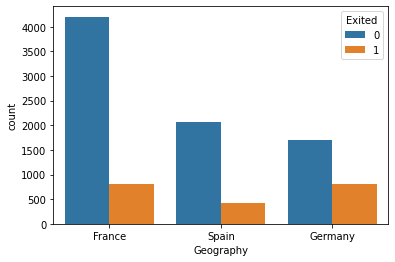

In [ ]:
a# Relação entre 'Geography' e 'Exited'

sns.countplot(x='Geography', hue = 'Exited',data = df_churn);

### Qual é a quantidade de homens e mulheres que saíram ou ficaram no banco?

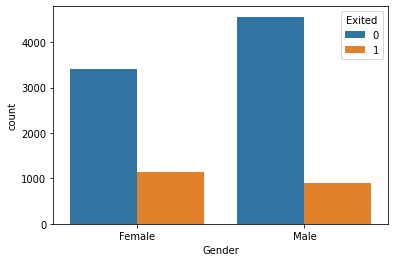

In [ ]:
# Relação entre 'Gender' e 'Exited'

sns.countplot(x='Gender', hue = 'Exited',data = df_churn);

### Qual é a quantidade de clientes que possuem cartão de crédito que saíram ou ficaram no banco?

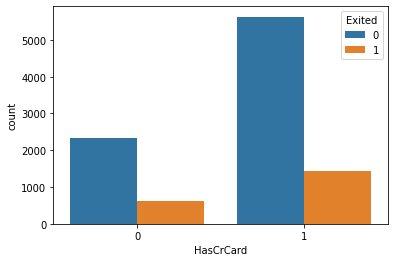

In [ ]:
# Relação entre 'HasCrCard' e 'Exited'

sns.countplot(x='HasCrCard', hue = 'Exited',data = df_churn);


### Qual é a quantidade de clientes que saíram ou ficaram no banco que são membros ativos?

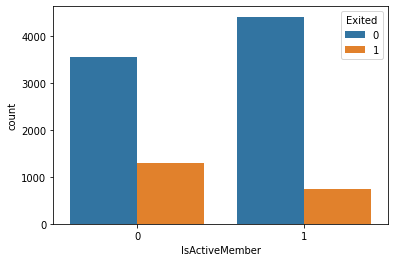

In [ ]:
# Relação entre 'IsActiveMember' e 'Exited'

sns.countplot(x='IsActiveMember', hue = 'Exited',data = df_churn);


### Qual é a quantidade de clientes que saíram ou ficaram no banco e quantos produtos eles possuem?

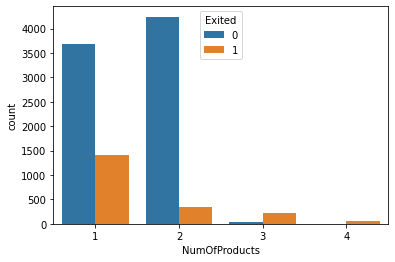

In [ ]:
# Relação entre 'NumOfProducts' e 'Exited'

sns.countplot(x='NumOfProducts', hue = 'Exited',data = df_churn);

### Qual é a distribuição por idade de clientes que saíram ou ficaram no banco?

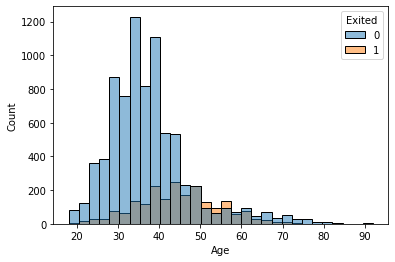

In [ ]:
# Relação entre 'Age' e 'Exited'

sns.histplot(data=df_churn, x="Age", hue='Exited', bins=30);

### Qual é a distribuição por escore de crédito de clientes que saíram ou ficaram no banco?

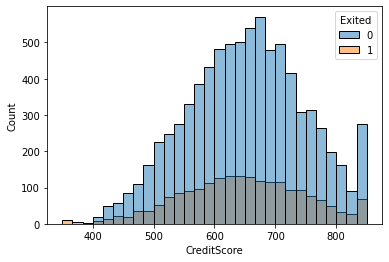

In [ ]:
# Relação entre 'CreditScore' e 'Exited'

sns.histplot(data=df_churn, x="CreditScore", hue='Exited', bins=30);

### Qual é a relação entre o saldo bancário de clientes que saíram ou ficaram no banco?

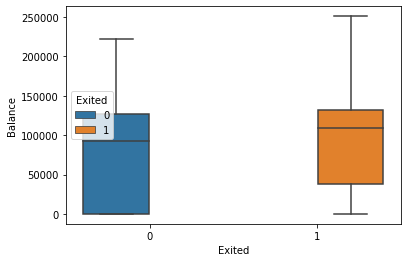

In [ ]:
# Relação entre 'Balance' e 'Exited'

sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited', data = df_churn);

#### **ANÁLISES**

- Mais de 50% clientes são da França.
- Cerca de 32% dos alemães deixaram o banco. 
- A proporção de churning de clientes do sexo feminino também é maior do que a de clientes do sexo masculino.
- A maioria dos clientes que desistiram são aqueles com cartões de crédito. Dado que a maioria dos clientes possui cartões de crédito, isso pode ser apenas uma coincidência.
- Os membros inativos tendem a sair mais. A proporção geral de membros inativos é bastante alta.
- A maioria dos clientes que possuem entre 3 e 4 produtos deixam de trabalhar com o banco. 100% dos clientes que usavam 4 produtos saíram.
- Clientes com idades entre 45 e 60 anos são mais propensos a sair do banco.
- Aqueles com uma pontuação de crédito abaixo de 400 têm altas taxas de abandono.
- Os clientes que deixam o banco têm saldos bancários mais altos.

#### **CONCLUSÃO**

O perfil de clientes que dão churn: 
- Mulheres
- Clientes entre 45 e 60 anos;
- Clientes com 3 ou 4 produtos; 
- Clientes com pontuação de crédito menor que 400;
- Clientes inativos;